# MLP

## Imports

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import cm

## Datengrundlage

In [2]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

data = load_iris()
x = data["data"][:,:2]
y = np.where(data["target"]>=1,1,0) # target binarisieren

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=45)

## Perzeptron

In [3]:
class Perceptron:
    def __init__(self,x):
        self.w = np.random.uniform(-1,1,size=(x.shape[1]))
        self.lr = 0.001
        
        self.error = []
        self.ws = []
        self.bs = []
        self.b = np.random.uniform(-1,1,size=1)
        
    def loss(self,y, prediction):
        # Clippen, um log(0) nicht undefiniert zu haben
        prediction = np.clip(prediction,0.0001,0.9999)
        loss = -np.mean(y*(np.log(prediction)) + (1-y)*np.log(1-prediction))
        return loss
    
    def accuracy(self,y, prediction):
        return 1-np.sum((prediction-y)**2)/y.shape[0]
    
    def predict(self,x):
        return np.where(np.dot(x,self.w)+self.b>=0,1,0)
    
    def iteration(self,x,y):
        errors = []
        
        # für jede Zeile in X
        for xi, yi in zip(x,y):
            prediction = self.predict(xi)
            errors.append(self.loss(yi, prediction))
            
            # Gewichte nach Lernregel anpassen
            self.w = self.w+self.lr*(yi-prediction)*xi
            self.b = self.b+self.lr*(yi-prediction)
            
        # Fehler speichern für Visualisierung
        self.error.append(np.mean(errors))
        self.ws.append(self.w)    
        self.bs.append(self.b)    

## Modell trainieren

In [4]:
# Modell initialisieren
model = Perceptron(x)

# Epochen trainieren
for _ in range(200):
    model.iteration(x_train,y_train)
    
# Modell testen
model.accuracy(y_test,model.predict(x_test))

0.96

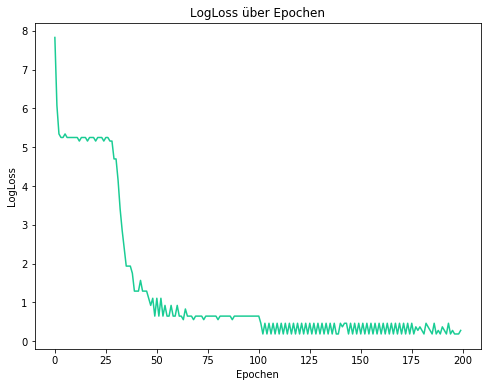

In [5]:
plt.figure(figsize=(8,6))
plt.plot(model.error,c="#1ACC94")
plt.title("LogLoss über Epochen")
plt.xlabel("Epochen")
plt.ylabel("LogLoss")
plt.show()

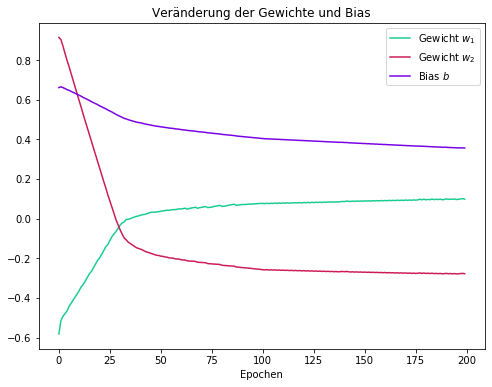

In [6]:
colors = ["#1ACC94","#CC1B58","#7902E5"]
plt.figure(figsize=(8,6))
for i, w in enumerate(np.array(model.ws).T):
    plt.plot(w,label="Gewicht $w_{}$".format(i+1),c=colors[i])
plt.plot(model.bs,label="Bias $b$",c=colors[-1])
plt.title("Veränderung der Gewichte und Bias")
plt.xlabel("Epochen")
plt.legend()
plt.show()

## Klassifikationsraum visualisieren

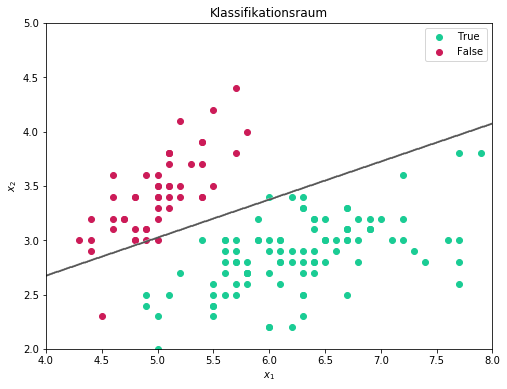

In [7]:
n = 500
z = []
meshgrid = np.meshgrid(np.linspace(4,8,n),np.linspace(2,5,n))
for value in np.nditer(meshgrid):
    z.append(model.predict(np.array(value)).item())

plt.figure(figsize=(8,6))
plt.contour(meshgrid[0],meshgrid[1],np.array(z).reshape(n,n),cmap=cm.Greys,alpha=0.5)
plt.scatter(x[np.where(y==1),:1],x[np.where(y==1),1:2],c="#1ACC94",label="True")
plt.scatter(x[np.where(y==0),:1],x[np.where(y==0),1:2],c="#CC1B58",label="False")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(4,8)
plt.ylim(2,5)
plt.legend()
plt.title("Klassifikationsraum")
plt.show()

## Das XOR-Problem

In [8]:
logical_x = np.array([[1,1],[0,1],[1,0],[0,0]])
logical_y_or = np.array([1,1,1,0])
logical_y_and = np.array([1,0,0,0])
logical_y_xor = np.array([0,1,1,0])

In [29]:
def train_model(x,y):
    model = Perceptron(x)
    for _ in range(1000):
        model.iteration(x,y)
    accuracy = model.accuracy(y,model.predict(x))*100  
    return model, accuracy

def zgrid(meshgrid,model):
    z = []
    for value in np.nditer(meshgrid):
        prediction = model.predict(np.array(value))
        z.append(prediction)
    return np.array(z).reshape(meshgrid[0].shape[0],meshgrid[0].shape[1])
    

## Klassifikationsraum des XOR-Problems visualisieren

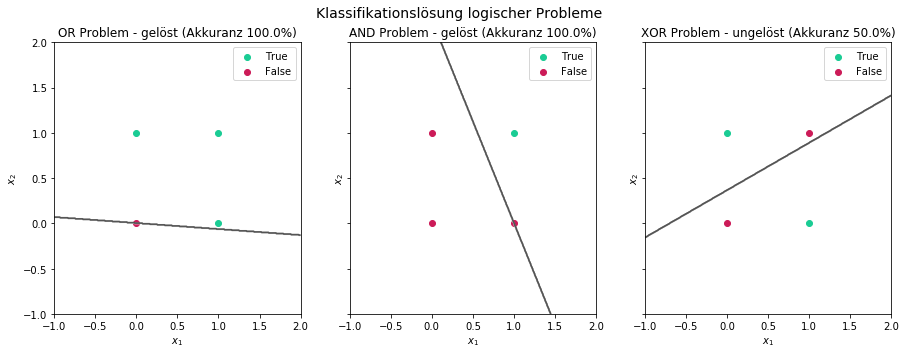

In [30]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
meshgrid = np.meshgrid(np.linspace(-1,2,n),np.linspace(-1,2,n))

fig.suptitle("Klassifikationslösung logischer Probleme", fontsize=14)

# Modell testen
model_or, accuracy_or = train_model(logical_x,logical_y_or)
axes[0].set_title("OR Problem - gelöst (Akkuranz {}%)".format(accuracy_or))
axes[0].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_or),cmap=cm.Greys,alpha=0.5)
axes[0].scatter(logical_x[np.where(logical_y_or==1),:1],logical_x[np.where(logical_y_or==1),1:],c="#1ACC94",label="True")
axes[0].scatter(logical_x[np.where(logical_y_or==0),:1],logical_x[np.where(logical_y_or==0),1:],c="#CC1B58",label="False")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].set_xlim(-1,2)
axes[0].set_ylim(-1,2)
axes[0].legend()
    
model_and, accuracy_and = train_model(logical_x,logical_y_and)
axes[1].set_title("AND Problem - gelöst (Akkuranz {}%)".format(accuracy_and))
axes[1].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_and),cmap=cm.Greys,alpha=0.5)
axes[1].scatter(logical_x[np.where(logical_y_and==1),:1],logical_x[np.where(logical_y_and==1),1:],c="#1ACC94",label="True")
axes[1].scatter(logical_x[np.where(logical_y_and==0),:1],logical_x[np.where(logical_y_and==0),1:],c="#CC1B58",label="False")
axes[1].set_xlabel("$x_1$")
axes[1].set_ylabel("$x_2$")
axes[1].legend()

model_xor, accuracy_xor = train_model(logical_x,logical_y_xor)
axes[2].set_title("XOR Problem - ungelöst (Akkuranz {}%)".format(accuracy_xor))
axes[2].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_xor),cmap=cm.Greys,alpha=0.5)
axes[2].scatter(logical_x[np.where(logical_y_xor==1),:1],logical_x[np.where(logical_y_xor==1),1:],c="#1ACC94",label="True")
axes[2].scatter(logical_x[np.where(logical_y_xor==0),:1],logical_x[np.where(logical_y_xor==0),1:],c="#CC1B58",label="False")
axes[2].set_xlabel("$x_1$")
axes[2].set_ylabel("$x_2$")
axes[2].legend()
plt.show()

## Perzeptronen hintereinander schalten

In [31]:
# Die Prädiktionen der AND und OR Modelle werden zum Input für das XOR Modell
prediction_and = model_and.predict(logical_x).reshape(-1,1)
prediction_or = model_or.predict(logical_x).reshape(-1,1)
merged = np.concatenate([prediction_and,prediction_or],axis=1)

model_xor, accuracy_xor = train_model(merged,logical_y_xor)

class OneBigModel:
    def __init__(self,model_and,model_or,model_xor):
        self.model_and = model_and
        self.model_or = model_or
        self.model_xor = model_xor
        
    def predict(self,x):
        prediction_and = self.model_and.predict(x).reshape(-1,1)
        prediction_or = self.model_or.predict(x).reshape(-1,1)
        merged = np.concatenate([prediction_and,prediction_or],axis=1)

        return self.model_xor.predict(merged)

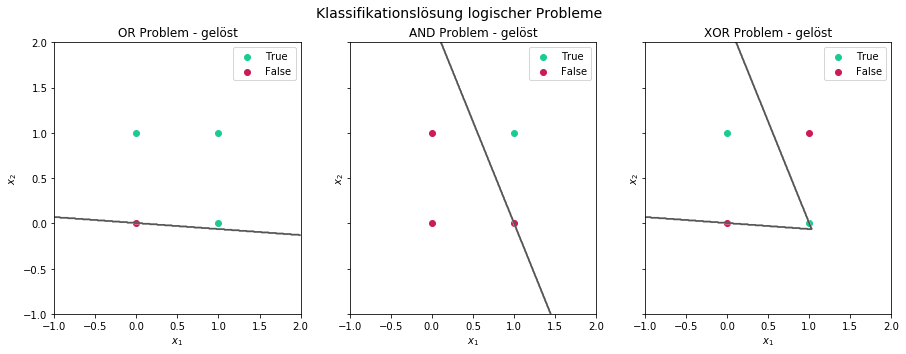

In [32]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
fig.suptitle("Klassifikationslösung logischer Probleme", fontsize=14)

# Modell testen
axes[0].set_title("OR Problem - gelöst")
axes[0].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_or),cmap=cm.Greys,alpha=0.5)
axes[0].scatter(logical_x[np.where(logical_y_or==1),:1],logical_x[np.where(logical_y_or==1),1:],c="#1ACC94",label="True")
axes[0].scatter(logical_x[np.where(logical_y_or==0),:1],logical_x[np.where(logical_y_or==0),1:],c="#CC1B58",label="False")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].set_xlim(-1,2)
axes[0].set_ylim(-1,2)
axes[0].legend()
    
axes[1].set_title("AND Problem - gelöst")
axes[1].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_and),cmap=cm.Greys,alpha=0.5)
axes[1].scatter(logical_x[np.where(logical_y_and==1),:1],logical_x[np.where(logical_y_and==1),1:],c="#1ACC94",label="True")
axes[1].scatter(logical_x[np.where(logical_y_and==0),:1],logical_x[np.where(logical_y_and==0),1:],c="#CC1B58",label="False")
axes[1].set_xlabel("$x_1$")
axes[1].set_ylabel("$x_2$")
axes[1].legend()

one_big_model = OneBigModel(model_and,model_or,model_xor)
axes[2].set_title("XOR Problem - gelöst")
axes[2].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,one_big_model),cmap=cm.Greys,alpha=0.5)
axes[2].scatter(logical_x[np.where(logical_y_xor==1),:1],logical_x[np.where(logical_y_xor==1),1:],c="#1ACC94",label="True")
axes[2].scatter(logical_x[np.where(logical_y_xor==0),:1],logical_x[np.where(logical_y_xor==0),1:],c="#CC1B58",label="False")
axes[2].set_xlabel("$x_1$")
axes[2].set_ylabel("$x_2$")
axes[2].legend()
plt.show()